## Metodos de agrupacion

In [102]:
import pandas as pd
import numpy as np

In [103]:
pune_dataset:str = r"../datasets/pune_1965_to_2002.csv"
pune_df = pd.read_csv(pune_dataset)
pune_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [104]:
pune_df.Year = pd.to_datetime(pune_df.Year, format="%Y").dt.to_period('Y')

In [105]:
pune_df.set_index("Year",inplace=True)


In [106]:
months_to_work = ['Jan','Feb','Mar']

In [107]:
(
pune_df
 .groupby(level=0)[months_to_work]
 .mean()
 .head(5)
)

,Jan,Feb,Mar
Year,,,
1965,0.029,0.069,0.000
1966,0.905,0.000,0.000
1967,0.248,3.390,1.320
1968,0.318,3.035,1.704
1969,0.248,2.524,0.334


In [108]:
# Otra forma de setear los meses
(pune_df
 .groupby(level=0)
 .mean()
 .reset_index()
 .set_index('Year')).head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


## Tratamiento de strings & limpieza usando opciones de string

In [109]:
presidents_df = pd.read_csv(
"https://docs.google.com/spreadsheets/d/e/2PACX-1vRj1KjW_raDRzdMieSzaAvyKtl2ub8Y6zM9X-4rhIB9C3NG-whBjTzj6UVTGo6qJ4fUT7x7SiCSW83u/pub?gid=1795471360&single=true&output=csv"
)

In [110]:
presidents_df.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [111]:
presidents_df_clean = presidents_df.iloc[:,2:]

In [112]:
FORMAT = "%B %d, %Y"
presidents_df_clean["start"]= pd.to_datetime(presidents_df_clean["start"],format=FORMAT,errors="coerce")
presidents_df_clean["end"]= pd.to_datetime(presidents_df_clean["end"],format=FORMAT,errors="coerce")

In [113]:
presidents_df_clean.head()

,start,end,president,prior,party,vice
0,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [114]:
presidents_df_clean.president.str.upper().sample(10)

42           GEORGE W. BUSH
21         GROVER CLEVELAND
26      WILLIAM HOWARD TAFT
23         GROVER CLEVELAND
31    FRANKLIN D. ROOSEVELT
22        BENJAMIN HARRISON
33     DWIGHT D. EISENHOWER
40        GEORGE H. W. BUSH
41             BILL CLINTON
37              GERALD FORD
Name: president, dtype: object

In [115]:
presidents_df_clean.president.str.len().sample(10)

28    17
40    17
25    18
31    21
22    17
37    11
12    16
5     17
17    16
13    15
Name: president, dtype: int64

In [116]:
presidents_df_clean.president.str.split().sample(10)

4          [James, Monroe]
21     [Grover, Cleveland]
42      [George, W., Bush]
1            [John, Adams]
30       [Herbert, Hoover]
13      [Franklin, Pierce]
22    [Benjamin, Harrison]
41         [Bill, Clinton]
27       [Woodrow, Wilson]
39        [Ronald, Reagan]
Name: president, dtype: object

In [117]:
presidents_df_clean.loc[presidents_df_clean.president.str.startswith('H')]

,start,end,president,prior,party,vice
30,1929-03-04,1933-03-04,Herbert Hoover,3rd United States Secretary of Commerce (19...,Republican,Charles Curtis
32,1945-04-12,1953-01-20,Harry S. Truman,34th Vice President of the United States,Democratic,Office vacant


# Graficos

### Lineas --> plot

In [118]:
import matplotlib.pyplot as plt
# 'bmh' style
plt.style.use('bmh')

In [119]:
x = np.linspace(0, 10, 100)
df = pd.DataFrame({
    "x": x,
    "y": np.sin(x)
})


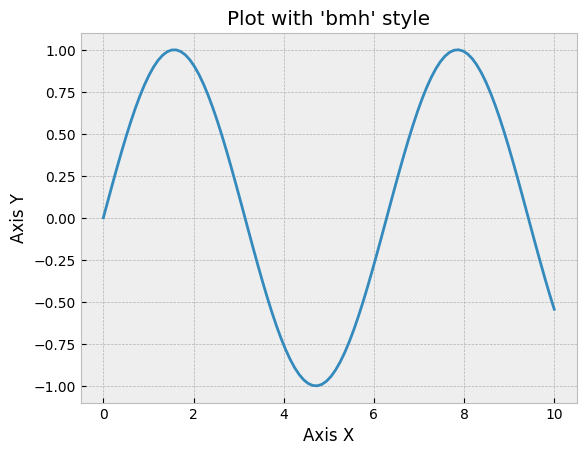

In [120]:

plt.plot(
    df.x,
    df.y
)

plt.title("Plot with 'bmh' style")
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.show()

### Ejemplo real con data de pune

In [121]:
from random import randint

In [122]:
presidents_df_clean["voters"] = presidents_df_clean.president.str.len() * randint(8_000,10_000)

In [123]:
columns_to_keep = ["start", "voters"]
data_to_plot = presidents_df_clean[columns_to_keep]

In [124]:
data_to_plot.set_index("start",inplace=True)

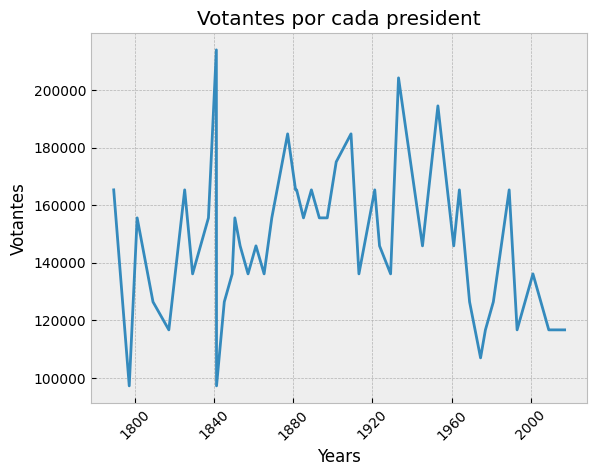

In [125]:
plt.plot(data_to_plot.index, data_to_plot['voters'])
plt.title("Votantes por cada president")

plt.xlabel("Years")
plt.ylabel("Votantes")

plt.xticks(rotation=45)
plt.show()

### ScatterPlots

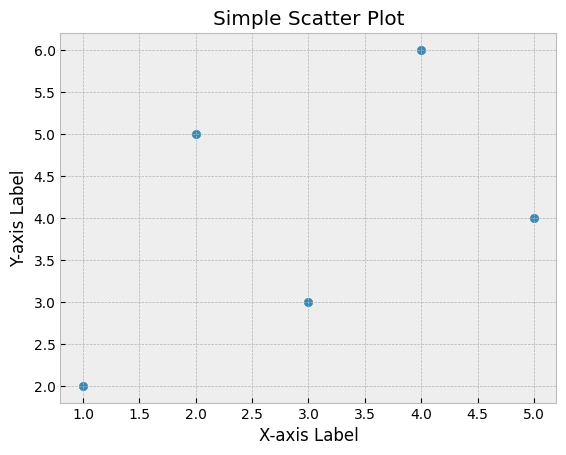

In [134]:
# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 5, 3, 6, 4])

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

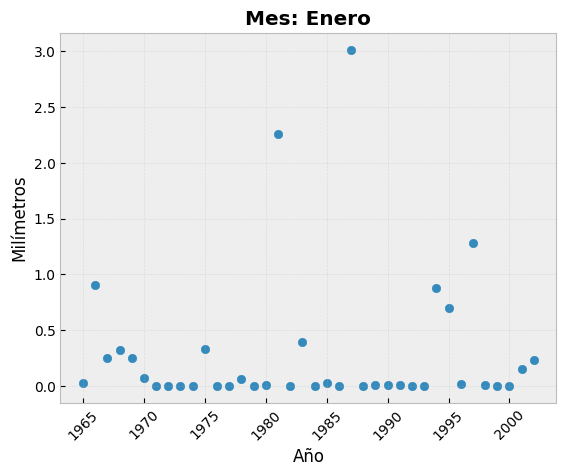

In [150]:
plt.scatter(pune_df.index.year, pune_df.Jan)

plt.title(f'Mes: Enero', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Milímetros')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

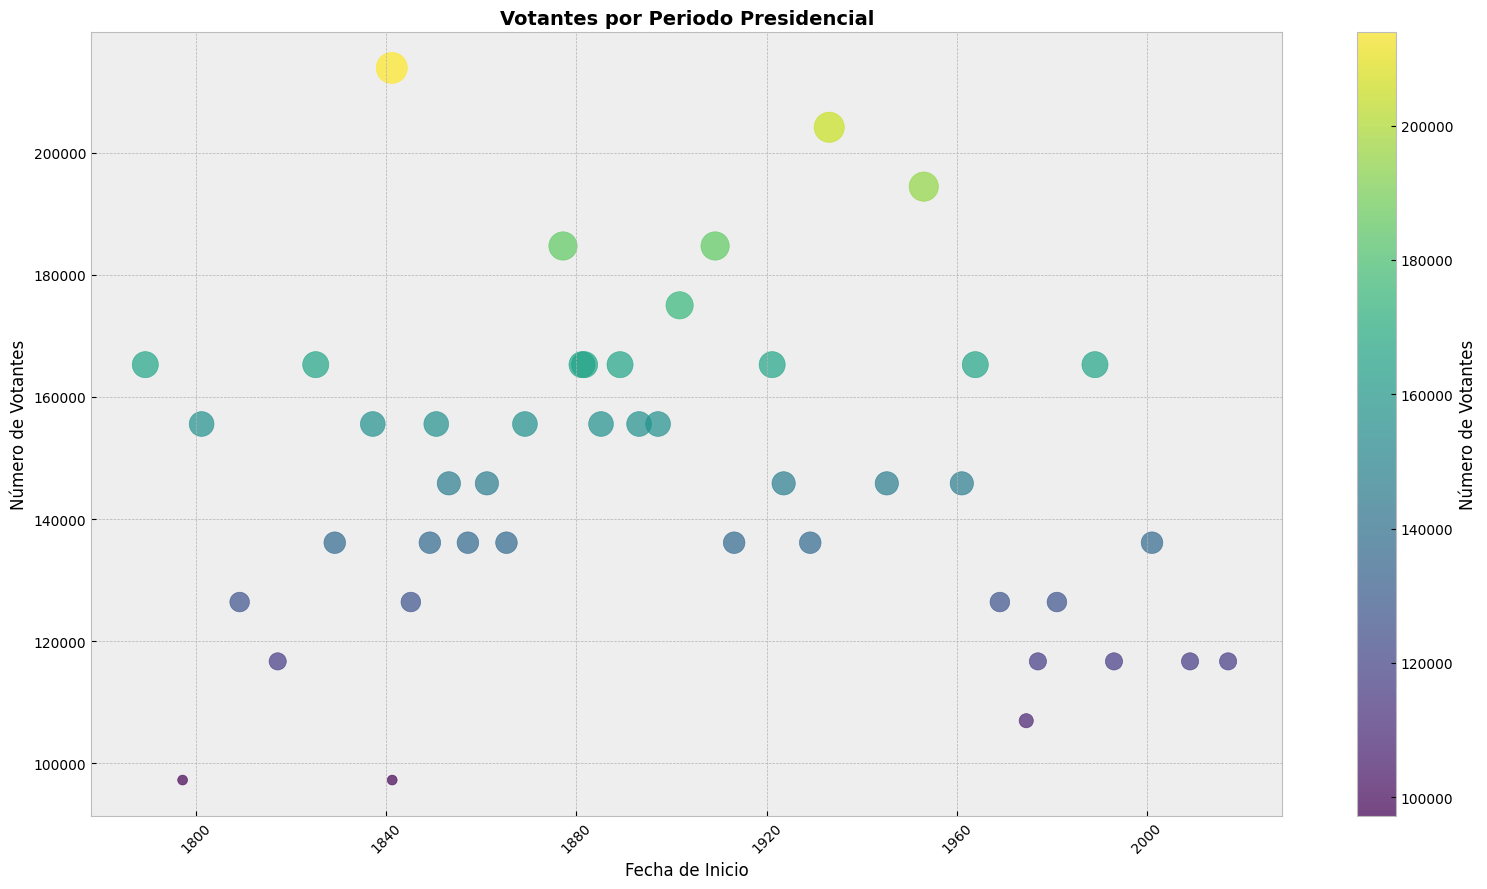

In [185]:
plt.figure(figsize=(16, 9))

min_size, max_size = 50, 500

# Normalizar los tamaños usando logaritmo para mejor visualización
log_voters = np.log(presidents_df_clean.voters)
sizes = (log_voters - log_voters.min()) / (log_voters.max() - log_voters.min()) * (max_size - min_size) + min_size

scatter = plt.scatter(
    presidents_df_clean.start,
    presidents_df_clean.voters,
    s=sizes,
    c=presidents_df_clean.voters,
    alpha=0.7
)

plt.colorbar(scatter, label='Número de Votantes')
plt.title('Votantes por Periodo Presidencial', fontweight='bold', fontsize=14)
plt.xlabel('Fecha de Inicio')
plt.ylabel('Número de Votantes')
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()


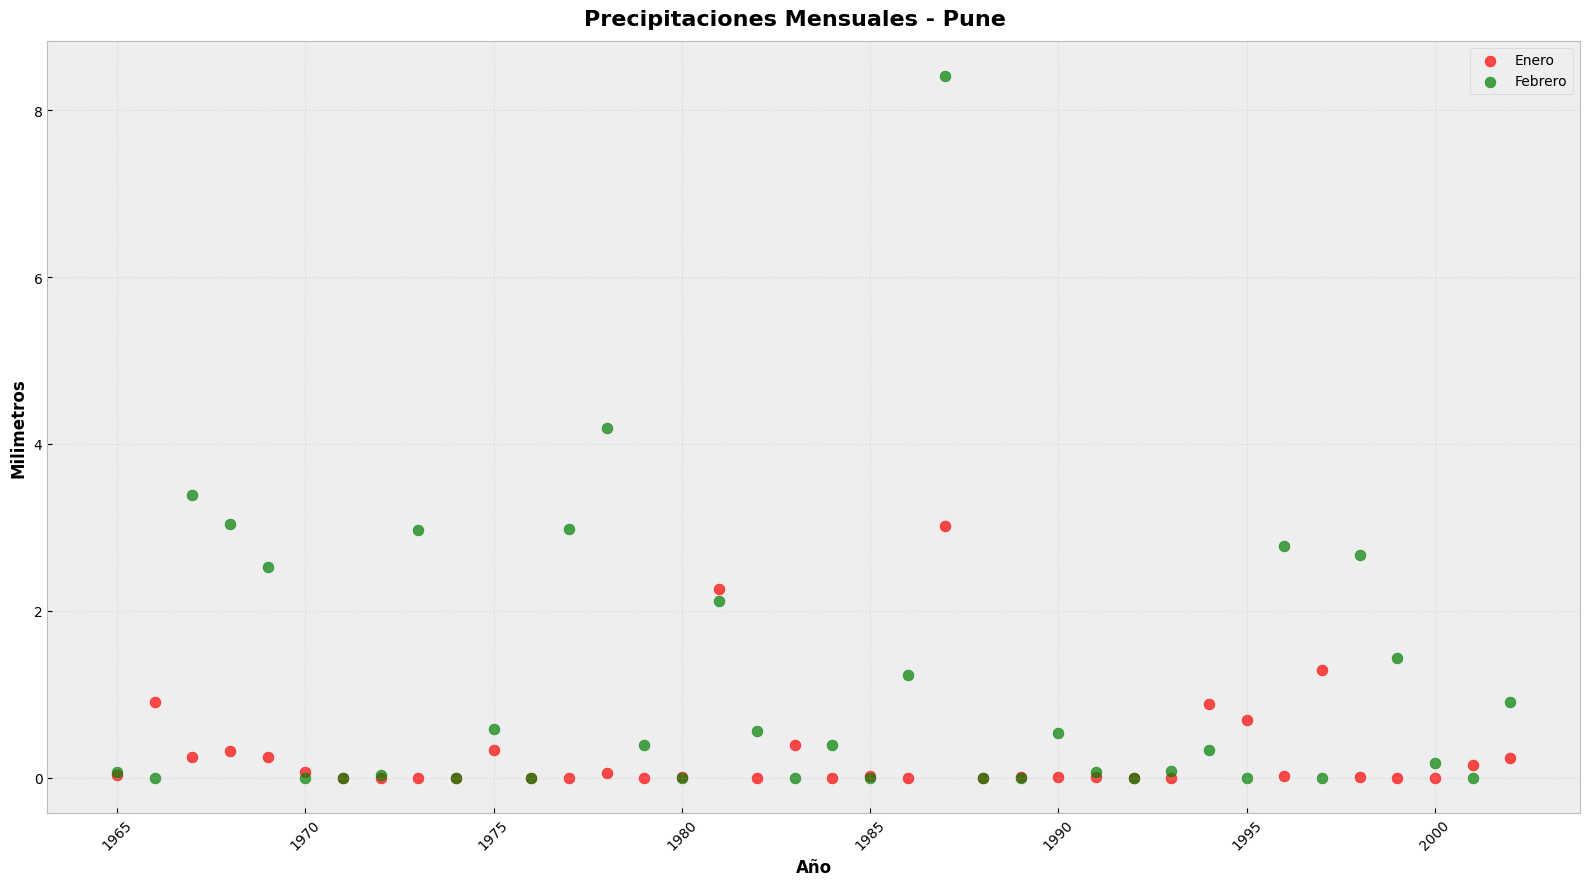

In [161]:
# meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


meses = ['Jan', 'Feb']
colors = ['red', 'green']

# Nombres completos en español
map_meses = {
    'Jan': 'Enero',
    'Feb': 'Febrero', 
    'Mar': 'Marzo',
    'Apr': 'Abril',
    'May': 'Mayo',
    'Jun': 'Junio',
    'Jul': 'Julio',
    'Aug': 'Agosto',
    'Sep': 'Septiembre',
    'Oct': 'Octubre',
    'Nov': 'Noviembre',
    'Dec': 'Diciembre'
}

plt.figure(figsize=(16, 9))

# # Suptitle con fuente más grande
# plt.suptitle("Precipitaciones por Fechas - Pune", fontsize=16, fontweight='bold')

# for i, mes in enumerate(meses, 1):
#     plt.subplot(3, 4, i)
#     plt.scatter(pune_df.index.year, pune_df[mes], alpha=0.7)

#     plt.title(f'Mes: {map_meses[mes]}', fontweight='bold')
#     plt.xlabel('Año')
#     plt.ylabel('Milímetros')
#     plt.xticks(rotation=45)
#     plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

## Opcion solo seteo de legend

plt.suptitle("Precipitaciones Mensuales - Pune", fontsize=16, fontweight='bold')

# Graficar todos los meses en un solo gráfico
for i, mes in enumerate(meses):
    plt.scatter(pune_df.index.year, pune_df[mes], 
                alpha=0.7, 
                s=60,
                color=colors[i],
                label=map_meses[mes])

plt.xlabel('Año', fontweight='bold')
plt.ylabel('Milimetros', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# # Leyenda fuera del gráfico
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#            title='Meses', title_fontsize=12,
#            frameon=True, fancybox=True, shadow=True)

plt.legend()

plt.tight_layout()
plt.show()

### BarPlots

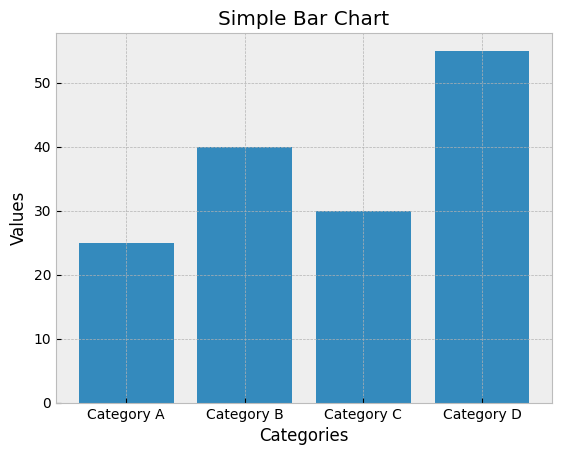

In [186]:
# Data for the bar chart
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 55]

# Create the bar chart
plt.bar(categories, values)

# Add labels and a title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Simple Bar Chart')

# Display the plot
plt.show()

In [190]:
top_presidents_by_voters = (
    presidents_df_clean
    .groupby("president")["voters"]
    .sum()
    .nlargest(3)
    .index
)

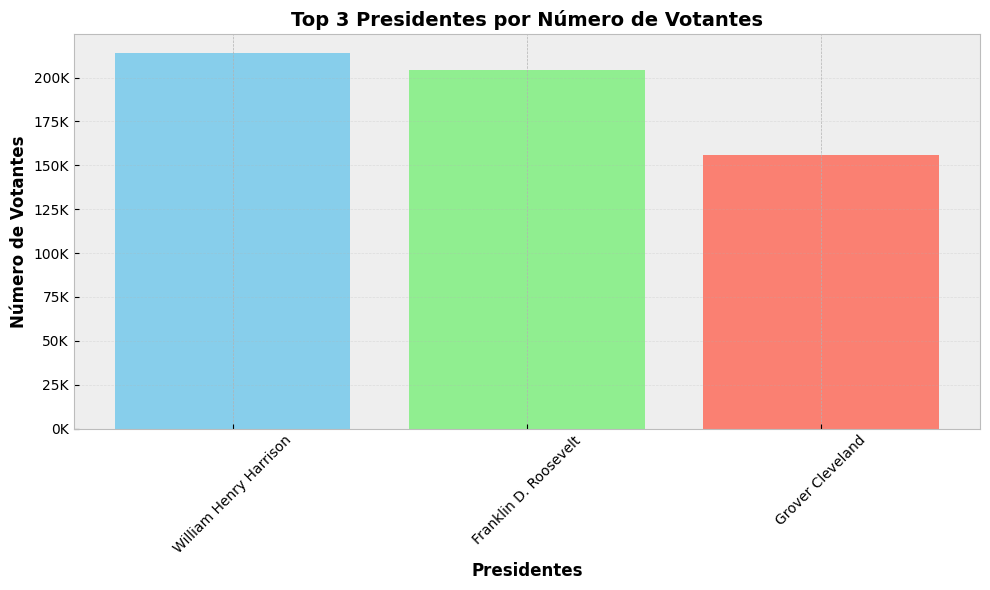

In [ ]:
df_presidents_top = presidents_df_clean.loc[
    presidents_df_clean.president.isin(top_presidents_by_voters),
    ["president", "voters"]
].sort_values(by="voters", ascending=False).drop_duplicates()


plt.figure(figsize=(10, 6))
bars = plt.bar(
    df_presidents_top.president,
    df_presidents_top.voters,
    color=['skyblue', 'lightgreen', 'salmon']
)



plt.xlabel('Presidentes', fontweight='bold')
plt.ylabel('Número de Votantes', fontweight='bold')
plt.title('Top 3 Presidentes por Número de Votantes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3) 
plt.xticks(rotation=45)

## Establecer formato de miles en el eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()

### Histograms Charts

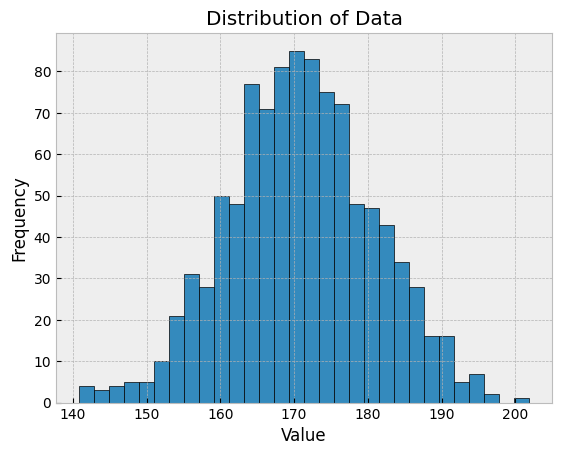

In [244]:
# Generate some sample data
data = np.random.normal(170, 10, 1000) # 1000 values from a normal distribution

# Create the histogram
plt.hist(data, bins=30, edgecolor='black') # 'bins' controls the number of bins, 'edgecolor' adds outlines

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')

# Display the plot
plt.show()

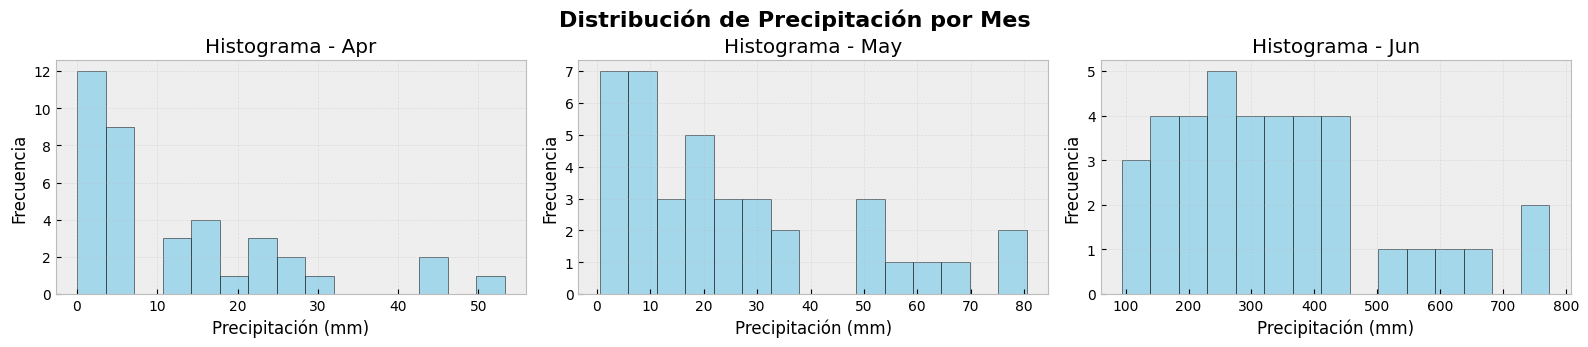

In [247]:
meses = [ 'Apr', 'May', 'Jun']

plt.figure(figsize=(16, 12))

for i, mes in enumerate(meses, 1):
    plt.subplot(4, 3, i)
    plt.hist(pune_df[mes], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {mes}')
    plt.xlabel('Precipitación (mm)')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

plt.suptitle('Distribución de Precipitación por Mes', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### (EXTRA mas avanzado)

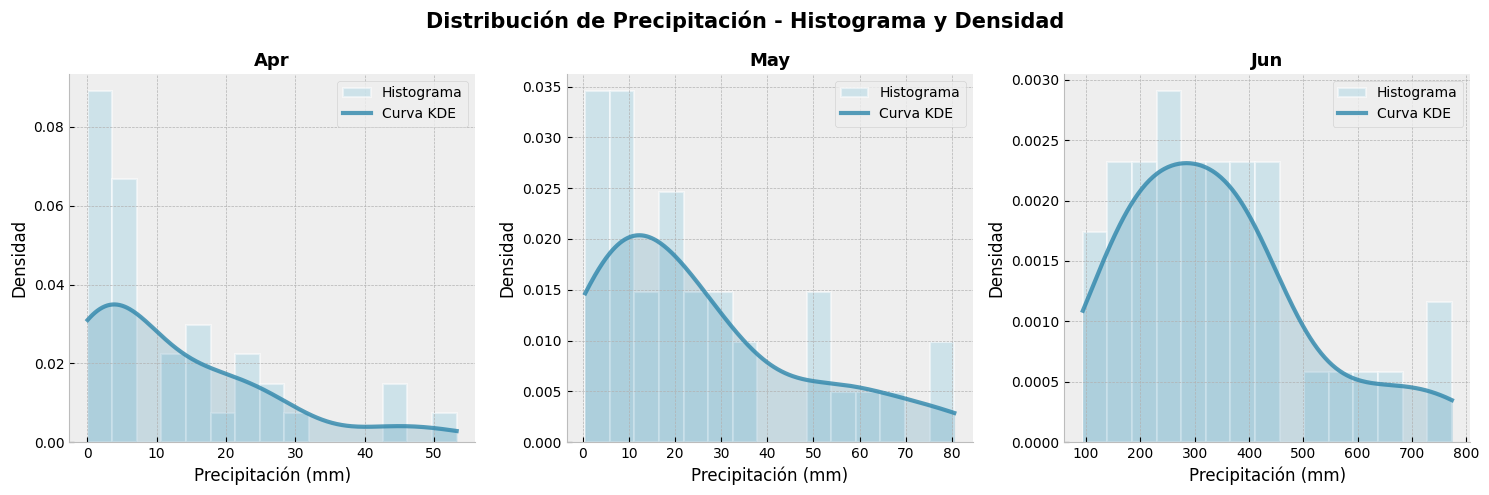

In [250]:
from scipy.stats import gaussian_kde

meses = ['Apr', 'May', 'Jun']

plt.figure(figsize=(15, 5))

for i, mes in enumerate(meses, 1):
    plt.subplot(1, 3, i)
    
    datos = pune_df[mes].dropna()
    
    # Histograma con bins
    n, bins, patches = plt.hist(datos, bins=15, alpha=0.5, color='lightblue', 
                               edgecolor='white', linewidth=1.5, density=True,
                               label='Histograma')
    
    # KDE elegante
    if len(datos) > 1:
        kde = gaussian_kde(datos)
        x_range = np.linspace(datos.min(), datos.max(), 300)
        kde_line = kde(x_range)
        plt.plot(x_range, kde_line, color='#2E86AB', linewidth=3, alpha=0.8,
                label='Curva KDE')
        plt.fill_between(x_range, kde_line, alpha=0.2, color='#2E86AB')
    
    plt.title(f'{mes}', fontsize=13, fontweight='bold')
    plt.xlabel('Precipitación (mm)')
    plt.ylabel('Densidad')
    plt.legend()
    
    # Estilo limpio
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.suptitle('Distribución de Precipitación - Histograma y Densidad', 
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

#### (Extra Lollipop)

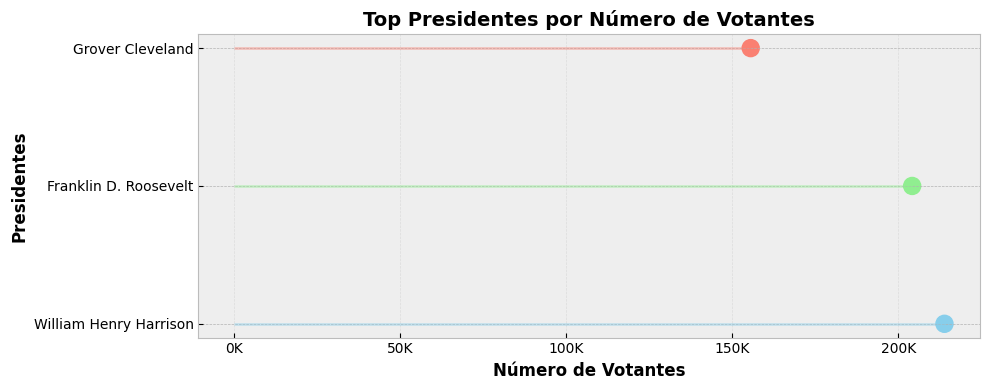

In [214]:
plt.figure(figsize=(10, 4))  # Reducir altura de la figura

colors = ['skyblue', 'lightgreen', 'salmon']

plt.hlines(y=range(len(df_presidents_top)), 
           xmin=0, 
           xmax=df_presidents_top.voters,
           colors=colors,
           alpha=0.4)

plt.scatter(df_presidents_top.voters, 
            range(len(df_presidents_top)), 
            c=colors, 
            s=150, 
            linewidth=1
            )

plt.yticks(range(len(df_presidents_top)), df_presidents_top.president)
plt.xlabel('Número de Votantes', fontweight='bold')
plt.ylabel('Presidentes', fontweight='bold')
plt.title('Top Presidentes por Número de Votantes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()

### PieCharts

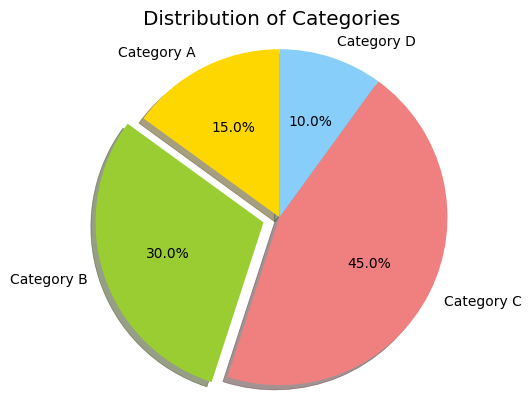

In [ ]:
sizes = [15, 30, 45, 10]
labels = ['Category A', 'Category B', 'Category C', 'Category D']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # Explode 'Category B'

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Distribution of Categories')
plt.show()

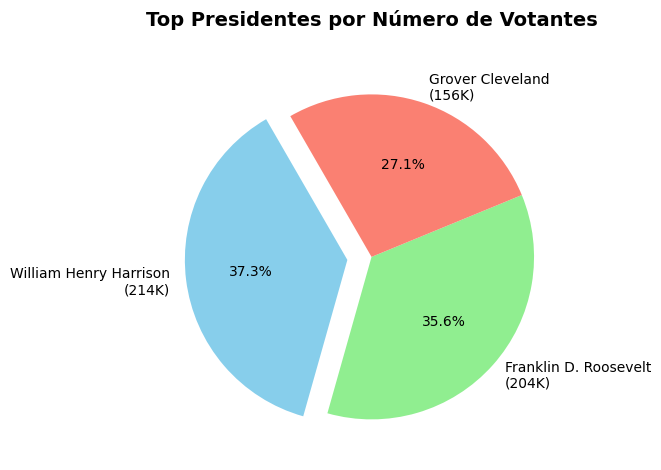

In [231]:

# Crear explode dinámicamente
explode = [0.15 if i == 0 else 0 for i in range(len(df_presidents_top))]

colors = [ 'skyblue', 'lightgreen', 'salmon']

plt.pie(
    df_presidents_top.voters,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%',
    colors=colors,
    startangle=120,
    explode=explode
)

plt.title('Top Presidentes por Número de Votantes', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Grafico BoxPlots

In [241]:
np.random.seed(42)

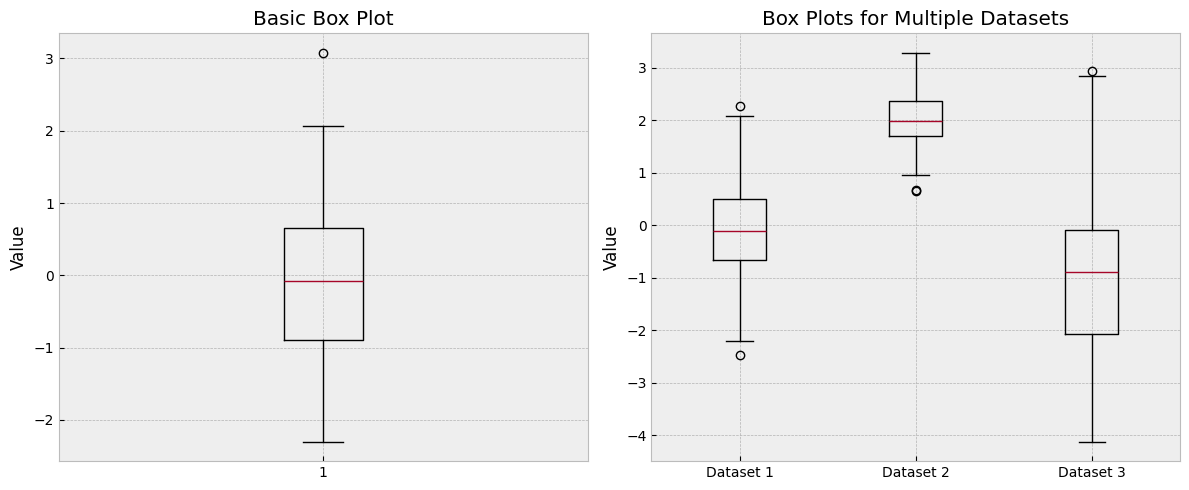

In [ ]:
# Generate some sample data
data = np.random.normal(loc=0, scale=1, size=100) # Single dataset
data_multiple = [np.random.normal(loc=0, scale=1, size=100),
                 np.random.normal(loc=2, scale=0.5, size=100),
                 np.random.normal(loc=-1, scale=1.5, size=100)] # Multiple datasets


df_single = pd.DataFrame({
    'values': data
})


df_multiple = pd.DataFrame({
    'Dataset_1': data_multiple[0],
    'Dataset_2': data_multiple[1], 
    'Dataset_3': data_multiple[2]
})

# # Create a basic box plot for a single dataset
# plt.figure(figsize=(6, 4))
# plt.boxplot(data)
# plt.title('Basic Box Plot')
# plt.ylabel('Value')
# plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Basic box plot for single dataset
ax1.boxplot(df_single.values)
ax1.set_title('Basic Box Plot')
ax1.set_ylabel('Value')

# Box plot for multiple datasets
ax2.boxplot(df_multiple.values)
ax2.set_title('Box Plots for Multiple Datasets')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Dataset 1', 'Dataset 2', 'Dataset 3'])
ax2.set_ylabel('Value')

plt.tight_layout()
plt.show()

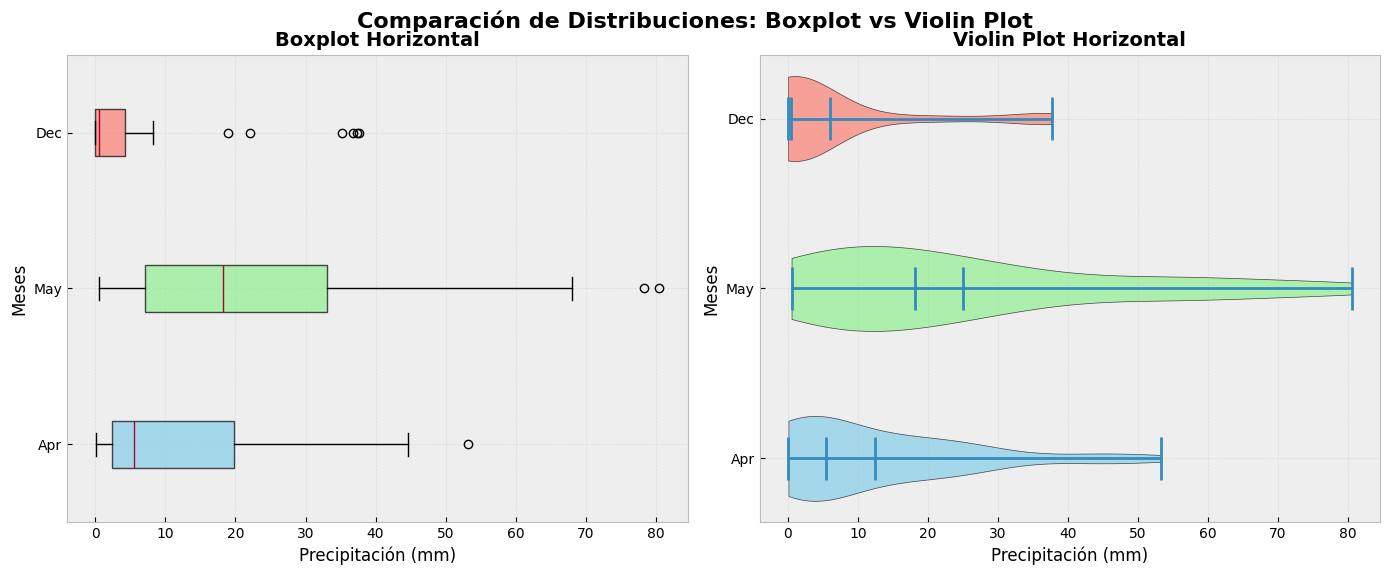

In [262]:
meses = ['Apr', 'May', 'Dec']
colores = ['skyblue', 'lightgreen', 'salmon']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# BOXPLOT HORIZONTAL
box_plot = ax1.boxplot([pune_df[mes] for mes in meses], 
                       tick_labels=meses,
                       patch_artist=True,
                       vert=False)  # Horizontal

for patch, color in zip(box_plot['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Boxplot Horizontal', fontsize=14, fontweight='bold')
ax1.set_xlabel('Precipitación (mm)')
ax1.set_ylabel('Meses')
ax1.grid(True, alpha=0.3)

# VIOLIN PLOT HORIZONTAL
violin_parts = ax2.violinplot([pune_df[mes] for mes in meses],
                             vert=False,  # Horizontal
                             showmeans=True,
                             showmedians=True)

for i, (pc, color) in enumerate(zip(violin_parts['bodies'], colores)):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')

# Configurar etiquetas del violin plot
ax2.set_yticks([1, 2, 3])
ax2.set_yticklabels(meses)
ax2.set_title('Violin Plot Horizontal', fontsize=14, fontweight='bold')
ax2.set_xlabel('Precipitación (mm)')
ax2.set_ylabel('Meses')
ax2.grid(True, alpha=0.3)

plt.suptitle('Comparación de Distribuciones: Boxplot vs Violin Plot', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

### HeatMaps

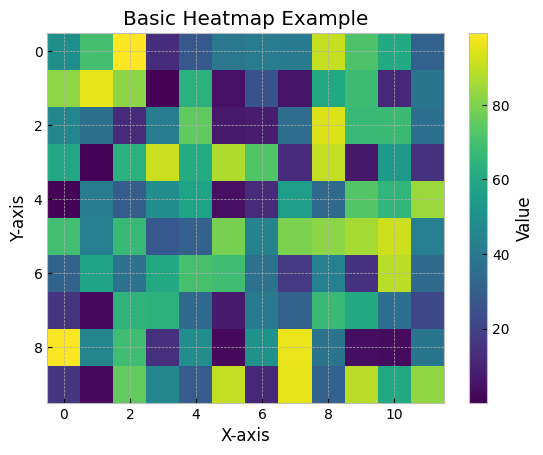

In [263]:
# Create some sample 2D data
data = np.random.rand(10, 12) * 100

# Create the heatmap
plt.imshow(data, cmap='viridis', aspect='auto') # 'viridis' is a common colormap, 'aspect' controls the aspect ratio

# Add a colorbar to interpret the colors
plt.colorbar(label='Value')

# Add labels and title for clarity
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Basic Heatmap Example')

# Display the plot
plt.show()

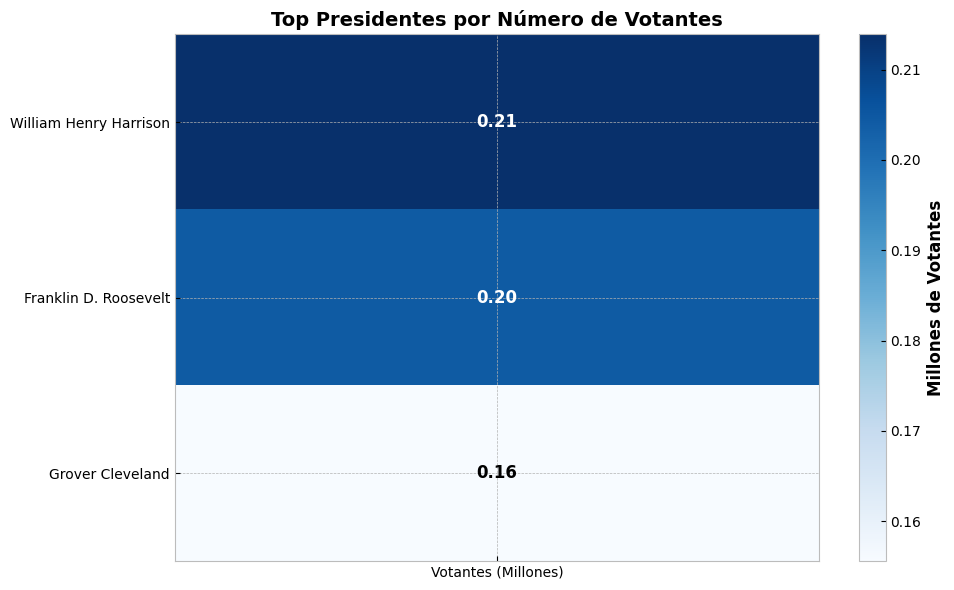

In [267]:
# Preparar datos para heatmap
heatmap_data = df_presidents_top[['president', 'voters']].copy()
heatmap_data['voters_millions'] = heatmap_data['voters'] / 1e6
heatmap_data = heatmap_data.set_index('president')

plt.figure(figsize=(10, 6))

# Crear heatmap con imshow
im = plt.imshow(heatmap_data[['voters_millions']], cmap='Blues', aspect='auto')

# Añadir barra de color
cbar = plt.colorbar(im)
cbar.set_label('Millones de Votantes', fontweight='bold')

# Añadir anotaciones con los valores
for i in range(len(heatmap_data)):
    value = heatmap_data.iloc[i, 1]  # voters_millions
    plt.text(0, i, f'{value:.2f}', 
             ha='center', va='center', 
             fontweight='bold', fontsize=12,
             color='white' if value > heatmap_data['voters_millions'].mean() else 'black')

# Configurar ejes
plt.yticks(range(len(heatmap_data)), heatmap_data.index)
plt.xticks([0], ['Votantes (Millones)'])
plt.title('Top Presidentes por Número de Votantes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [264]:
import seaborn as sns

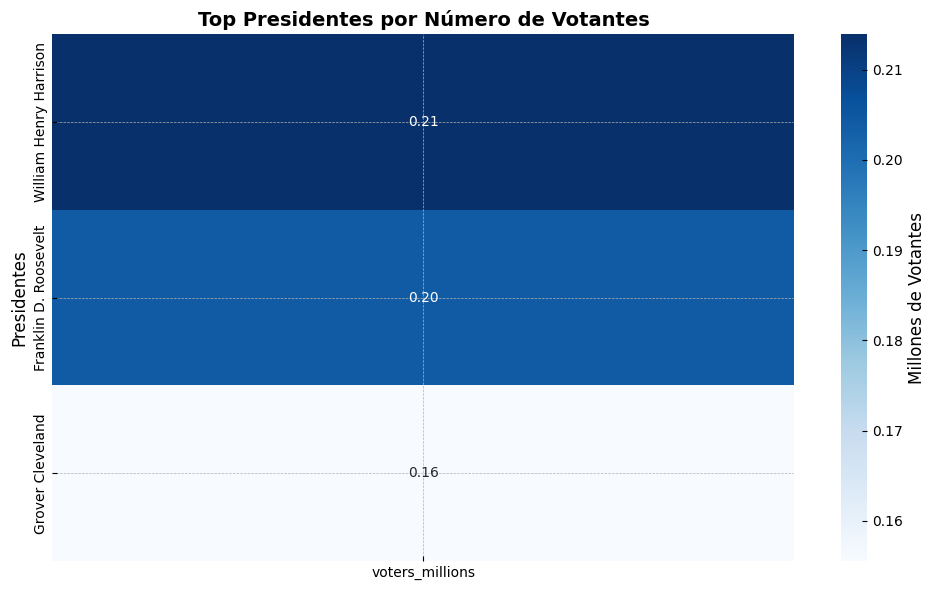

In [266]:
# Preparar datos para heatmap
heatmap_data = df_presidents_top[['president', 'voters']].copy()
heatmap_data['voters_millions'] = heatmap_data['voters'] / 1e6
heatmap_data = heatmap_data.set_index('president')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data[['voters_millions']], 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            cbar_kws={'label': 'Millones de Votantes'})

plt.title('Top Presidentes por Número de Votantes', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Presidentes')
plt.tight_layout()
plt.show()